# Homework

http://home.cse.ust.hk/~lzhang/teach/msbd5012/

- Programming assignment (2020.10.10)

- Writting assignment (2020.10.03)


# Logestic regression

## Gradient Descent

https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,function%20at%20the%20current%20point.

$$J'(w) = \frac{dJ(w)}{dw} = lim_{e \to 0}\frac{J(w+e) - l(w)}{E}$$
$$J(w + e) = J(w) + eJ'(w)$$ 

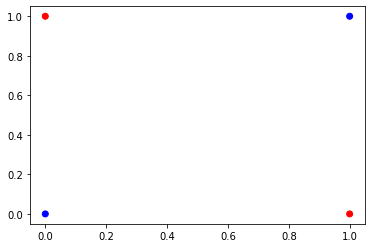

In [7]:
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import numpy as np

x0 = np.array([1, 1, 1, 1])
x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
x3 = x1 * x2
y = [1 ,0 ,0 ,1]
colors = ['red' if i == 0 else 'blue' for i in y]
X = np.column_stack((x1, x2))
# X = np.column_stack((x0, x1, x2, x3))
plt.scatter(x1, x2, color=colors)

In [8]:
import statsmodels.api as sm

print(X)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000  
Dependent Variable: y                AIC:              9.5452 
Date:               2020-10-03 07:41 BIC:              8.3178 
No. Observations:   4                Log-Likelihood:   -2.7726
Df Model:           1                LL-Null:          -2.7726
Df Residuals:       2                LLR p-value:      1.0000 
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     1.0000                                    
-----------------------------------------------------------------
      Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
-----------------------------------------------------------------
x1    0.0000      1.6330    0.0000    1.0000    -3.2006    3.2006
x2    0.0000      1.6330    0.0000    1.0000    -3.2006    3.2

In [ ]:
predictions = model.predict(X)
predictions

array([0, 0, 0, 0])

## Batch gradient descent

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/#:~:text=Batch%20gradient%20descent%20is%20a,is%20called%20a%20training%20epoch.

$$w_j \leftarrow w_j + \alpha  \frac{1}{N}\sum^{N}_{i=1}[y_i - \sigma (w^Tx_i)]x_{i,j} $$

- $y_i$: Observed output
- $\sigma (w^Tx_i)$ Predicted output
- $x_{i, j}$ input

In [ ]:
import math
import numpy as np

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
a = 0.1
x_1 = [1, 1, 1, 1]
x_2 = [0, 0, 1, 1]
x_3 = [0, 1, 0 ,1]
w_1 = -2
w_2 = 1
w_3 = 1
y = [1, 0, 0, 1]

def compute(x, w_i):
    sum_i = 0
    n = len(x)
    for i in range(n):
        predicted_output = w_1 + w_2 * x_2[i] + w_3 * x_3[i]
        temp =  (y[i] - sigmoid(predicted_output)) * x[i]
        sum_i += temp

    result = w_i + a * sum_i / n
    return result


print(compute(x_1, w_1))
print(compute(x_2, w_2))
print(compute(x_3, w_3))

-1.9789271441190528
1.00577646446575
1.00577646446575


In [ ]:
for i in range(100):
    w_1 = compute(x_1, w_1)
    w_2 = compute(x_2, w_2)
    w_3 = compute(x_3, w_3)

err1 = w_1 + w_2 * x_2[0] + w_3 * x_3[0]
err2 = w_1 + w_2 * x_2[1] + w_3 * x_3[1]
err3 = w_1 + w_2 * x_2[2] + w_3 * x_3[2]
err4 = w_1 + w_2 * x_2[3] + w_3 * x_3[3]

(err1 + err2 + err3 + err4) / 4

-0.07952691518172225

## Stochastic Gradient descent

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

## Newton's method

### Adavantages

If we only do the 1st order, then we will get overestimate, but with second order estimate, we will correct the overestimate.

# Softmax Regression